In [0]:
from fastai.vision import *

In [0]:
 !pip install "torch==1.4" "torchvision==0.5.0" jdc # Execute this If you get Warning while loading data or training model

In [0]:
path = Path('/COVID-19-Dataset/')

In [0]:
path.ls()

In [0]:
np.random.seed(42)     
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
         size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet18,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.716298,0.887937,0.247126,01:16
1,0.943396,0.311261,0.063218,00:10
2,0.605852,0.114608,0.028736,00:06
3,0.426165,0.140472,0.034483,00:06
4,0.318538,0.110733,0.028736,00:07
5,0.240775,0.104162,0.034483,00:06
6,0.191646,0.103076,0.028736,00:06
7,0.154220,0.106495,0.034483,00:06


In [0]:
learn.save('Res18-8Epocs-4classes')

In [0]:
learn.lr_find(start_lr=1e-6, end_lr=1e-3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


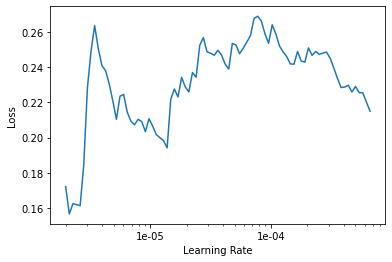

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(6e-5,6e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.249613,0.216676,0.028736,00:06
1,0.234668,0.185171,0.028736,00:06
2,0.203033,0.169803,0.034483,00:07
3,0.166143,0.173358,0.028736,00:07


In [0]:
learn.save('resnet18-4epochs-finetuned-4classes')

## Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

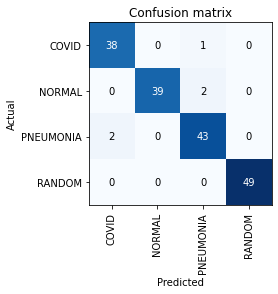

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.export("exported-4classes")

In [0]:
defaults.device = torch.device('cpu')

In [0]:
learn = load_learner(path,file='exported-4classes')

In [0]:
testImage = open_image('testImg.jpeg')
pred_class,pred_idx,outputs = learn.predict(testImage)
pred_class,pred_idx,outputs

(Category tensor(2),
 tensor(2),
 tensor([2.8951e-10, 1.4012e-10, 1.0000e+00, 1.1180e-15]))